In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.abspath(os.path.dirname("__file__")), '..'))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from utils import data_handling, model_assessment
from ipywidgets import interact

## Setup visualization settings

In [2]:
plt.style.use('seaborn-paper')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5.0
plt.rcParams['xtick.minor.size'] = 3.0
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['legend.handlelength'] = 2.0
minor_locator = AutoMinorLocator(4)

## Load and prepare test data

In [3]:
cell_images, cell_labels, cell_types = data_handling.load_data_from_file('../data/labels.csv')

train_test_split = int(0.85 * cell_images.shape[0])
X_test, Y_test, Z_test = \
    cell_images[train_test_split : ], \
    cell_labels[train_test_split : ], cell_types[train_test_split : ]
X_test, Y_test, Z_test = data_handling.preprocess_data(X_test, Y_test, Z_test)

## Assess classification models' accuracy, precision, recall, and F1-score 

[0.746268630027771, 0.5573770403862, 0.698630154132843, 0.6200607915852425]
[0.7671641707420349, 0.6144578456878662, 0.698630154132843, 0.6538461694869848]
[0.7253731489181519, 0.4437499940395355, 0.9930070042610168, 0.613390925178379]
[0.737313449382782, 0.9743589758872986, 0.2405063360929489, 0.3857868111288081]


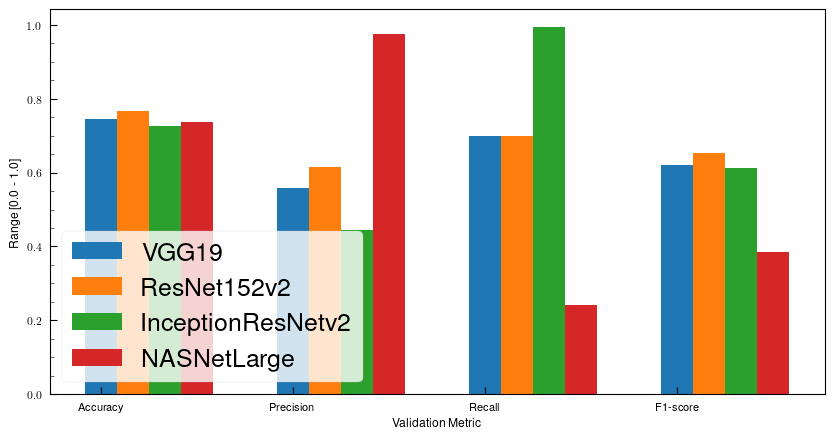

In [4]:
VGG19_val_results = model_assessment.get_accuracy_precision_recall_F1('../models/history/VGG19_1.00.00_ss.npy')
print(VGG19_val_results)

ResNet152v2_val_results = \
    model_assessment.get_accuracy_precision_recall_F1('../models/history/ResNet152v2_1.00.00_ss.npy')
print(ResNet152v2_val_results)

InceptionResNetv2_val_results = \
    model_assessment.get_accuracy_precision_recall_F1('../models/history/InceptionResNetv2_1.00.00_ss.npy')
print(InceptionResNetv2_val_results)

NasNetLarge_val_results = \
    model_assessment.get_accuracy_precision_recall_F1('../models/history/NasNetLarge_1.00.00_ss.npy')
results = [VGG19_val_results, ResNet152v2_val_results, InceptionResNetv2_val_results, NasNetLarge_val_results]
print(NasNetLarge_val_results)

fig, axs = plt.subplots(1, 1, figsize = (10,5))
model_name = ['VGG19', 'ResNet152v2', 'InceptionResNetv2', 'NASNetLarge']
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

for i in range(4):
    width = 0.5
    xposition = [0.0 + i * width, 3.0 + i * width, 6.0 + i * width, 9.0 + i * width]
    rects = axs.bar(xposition, results[i], width, label = model_name[i])
xposition = [0.0, 3.0, 6.0, 9.0]
plt.xticks(xposition, labels)
axs.set_xlabel('Validation Metric')
axs.set_ylabel('Range [0.0 - 1.0]')
axs.yaxis.set_minor_locator(minor_locator)
axs.legend(model_name, loc = 'lower left')
plt.show()



## Assess and visualize ROC curve and AUC

13/13 [==============================] - 7s 264ms/step


c:\ProgramData\Anaconda3\envs\tensorflow_latest\lib\site-packages\keras\layers\core\lambda_layer.py:303: UserWarning: keras.applications.inception_resnet_v2 is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,


13/13 [==============================] - 11s 416ms/step
[0.7557227181111431, 0.7186690181399367, 0.7039663115462137, 0.649114598329974]


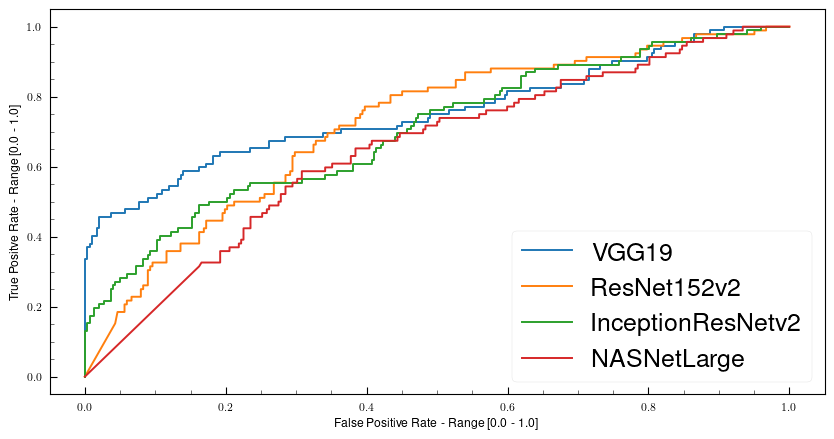

In [5]:
VGG19_auc, VGG19_fpr, VGG19_tpr = \
    model_assessment.compute_AUC('../models/weights/VGG19_1.00.00_ss.hdf5', X_test, Y_test)
RestNet152v2_auc, RestNet152v2_fpr, RestNet152v2_tpr = \
    model_assessment.compute_AUC('../models/weights/ResNet152v2_1.00.00_ss.hdf5', X_test, Y_test)
InceptionResNetv2_auc, InceptionResNetv2_fpr, InceptionResNetv2_tpr = \
    model_assessment.compute_AUC('../models/weights/InceptionResNetv2_1.00.00_ss.hdf5', X_test, Y_test)
NasNetLarge_auc, NasNetLarge_fpr, NasNetLarge_tpr = \
    model_assessment.compute_AUC('../models/weights/NasNetLarge_1.00.00_ss.hdf5', X_test, Y_test)
print([VGG19_auc, RestNet152v2_auc, InceptionResNetv2_auc, NasNetLarge_auc])

fig, axs = plt.subplots(1, 1, figsize = (10,5))
axs.plot(VGG19_fpr, VGG19_tpr, label = model_name[0])
axs.plot(RestNet152v2_fpr, RestNet152v2_tpr, label = model_name[1])
axs.plot(InceptionResNetv2_fpr, InceptionResNetv2_tpr, label = model_name[2])
axs.plot(NasNetLarge_fpr, NasNetLarge_tpr, label = model_name[3])
axs.set_xlabel('False Positive Rate - Range [0.0 - 1.0]')
axs.set_ylabel('True Positve Rate - Range [0.0 - 1.0]')
axs.xaxis.set_minor_locator(minor_locator)
axs.yaxis.set_minor_locator(minor_locator)
axs.legend(loc = 'lower right')
plt.show()


## Assess and visualize confusion matrix

13/13 [==============================] - 5s 254ms/step


c:\ProgramData\Anaconda3\envs\tensorflow_latest\lib\site-packages\keras\layers\core\lambda_layer.py:303: UserWarning: keras.applications.inception_resnet_v2 is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,


13/13 [==============================] - 10s 372ms/step


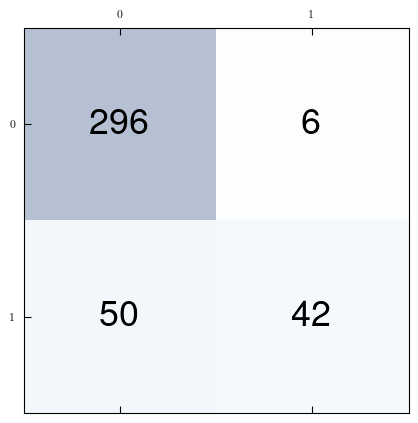

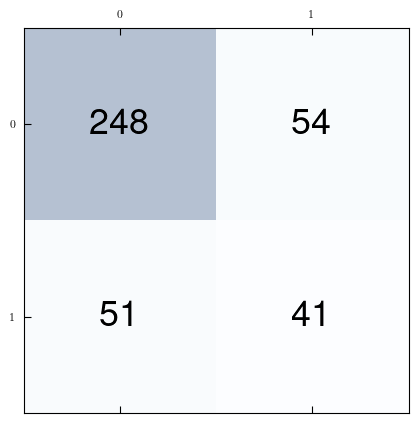

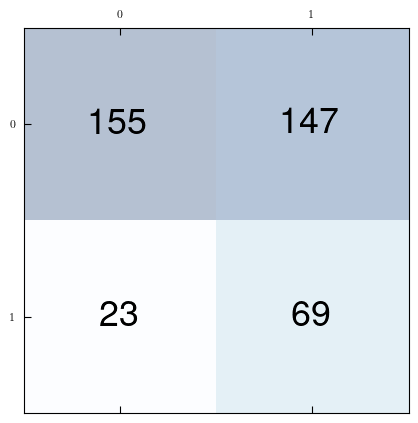

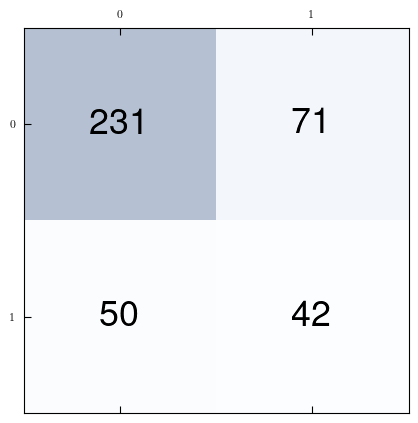

In [6]:
defect_probability = 0.3333333333333333
VGG19_cm = model_assessment.compute_confusion_matrix(\
    '../models/weights/VGG19_1.00.00_ss.hdf5', X_test, Y_test, defect_probability)
RestNet152v2_cm = model_assessment.compute_confusion_matrix(\
    '../models/weights/ResNet152v2_1.00.00_ss.hdf5', X_test, Y_test, defect_probability)
InceptionResNetv2_cm = model_assessment.compute_confusion_matrix(\
    '../models/weights/InceptionResNetv2_1.00.00_ss.hdf5', X_test, Y_test, defect_probability)
NasNetLarge_cm = \
    model_assessment.compute_confusion_matrix('../models/weights/NasNetLarge_1.00.00_ss.hdf5', X_test, Y_test, defect_probability)

fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(VGG19_cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(VGG19_cm.shape[0]):
    for j in range(VGG19_cm.shape[1]):
        ax.text(x = j, y = i,s = VGG19_cm[i, j], va = 'center', ha = 'center', size = 'xx-large')

fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(RestNet152v2_cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(RestNet152v2_cm.shape[0]):
    for j in range(RestNet152v2_cm.shape[1]):
        ax.text(x = j, y = i,s = RestNet152v2_cm[i, j], va = 'center', ha = 'center', size = 'xx-large')

fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(InceptionResNetv2_cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(InceptionResNetv2_cm.shape[0]):
    for j in range(InceptionResNetv2_cm.shape[1]):
        ax.text(x = j, y = i,s = InceptionResNetv2_cm[i, j], va = 'center', ha = 'center', size = 'xx-large')

fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(NasNetLarge_cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(NasNetLarge_cm.shape[0]):
    for j in range(NasNetLarge_cm.shape[1]):
        ax.text(x = j, y = i,s = NasNetLarge_cm[i, j], va = 'center', ha = 'center', size = 'xx-large')  

## Assess and visualize class activation maps (CAMs)

In [7]:
@interact(n = (0, X_test.shape[0]))
def display_CAM(n = 0):
    cell_image = X_test[n]
    cam_output, prediction = model_assessment.compute_CAM(\
        '../models/weights/NasNetLarge_1.00.00_ss.hdf5', cell_image, 'activation_259', (10, 10))

    fig, axs = plt.subplots(1, 1, figsize = (5,5))
    axs.imshow(cell_image, cmap = 'gray', alpha = 0.7)
    axs.imshow(cam_output, cmap = 'jet', alpha = 0.3)
    axs.set_title(f'Predict Probability: {prediction} - Actual Probability: {Y_test[n]} - Cell Type: {Z_test[n]}')

interactive(children=(IntSlider(value=0, description='n', max=394), Output()), _dom_classes=('widget-interact'…